In [1]:
import os

os.chdir('../')
os.getcwd()

'/home/bitwalk/MyProjects/stock-explorer'

In [2]:
# ライブラリーの読み込み
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot as plt
# グラフのスタイルとサイズ
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
import glob

ticker = '8035'
glob_path = 'cache/%s*.pkl' % ticker
files = sorted(glob.glob(glob_path))
files, len(files)

(['cache/8035.T_2024-02-26_2024-02-27_1m.pkl',
  'cache/8035.T_2024-02-27_2024-02-28_1m.pkl',
  'cache/8035.T_2024-02-28_2024-02-29_1m.pkl',
  'cache/8035.T_2024-02-29_2024-03-01_1m.pkl',
  'cache/8035.T_2024-03-01_2024-03-02_1m.pkl',
  'cache/8035.T_2024-03-04_2024-03-05_1m.pkl',
  'cache/8035.T_2024-03-05_2024-03-06_1m.pkl',
  'cache/8035.T_2024-03-06_2024-03-07_1m.pkl',
  'cache/8035.T_2024-03-07_2024-03-08_1m.pkl',
  'cache/8035.T_2024-03-08_2024-03-09_1m.pkl',
  'cache/8035.T_2024-03-11_2024-03-12_1m.pkl',
  'cache/8035.T_2024-03-12_2024-03-13_1m.pkl',
  'cache/8035.T_2024-03-13_2024-03-14_1m.pkl',
  'cache/8035.T_2024-03-14_2024-03-15_1m.pkl',
  'cache/8035.T_2024-03-15_2024-03-16_1m.pkl',
  'cache/8035.T_2024-03-18_2024-03-19_1m.pkl',
  'cache/8035.T_2024-03-19_2024-03-20_1m.pkl',
  'cache/8035.T_2024-03-21_2024-03-22_1m.pkl',
  'cache/8035.T_2024-03-22_2024-03-23_1m.pkl',
  'cache/8035.T_2024-03-25_2024-03-26_1m.pkl',
  'cache/8035.T_2024-03-26_2024-03-27_1m.pkl',
  'cache/8035

In [4]:
import pandas as pd

list_df_close = list()
list_count = list()
for pkl in files:
    file = os.path.join(pkl)    
    df = pd.read_pickle(file)
    list_df_close.append(df['Close'])
    list_count.append(len(df))

#df_close = pd.concat(list_df_close).reset_index(drop=True)
df_close = pd.concat(list_df_close)
df = pd.DataFrame(df_close)

print(df, list_count)

                             Close
Datetime                          
2024-02-26 09:00:00+09:00  36490.0
2024-02-26 09:01:00+09:00  36580.0
2024-02-26 09:02:00+09:00  36540.0
2024-02-26 09:03:00+09:00  36530.0
2024-02-26 09:04:00+09:00  36470.0
...                            ...
2024-05-02 14:55:00+09:00  35030.0
2024-05-02 14:56:00+09:00  35050.0
2024-05-02 14:57:00+09:00  35050.0
2024-05-02 14:58:00+09:00  35060.0
2024-05-02 14:59:00+09:00  35080.0

[14109 rows x 1 columns] [301, 302, 299, 302, 300, 299, 302, 302, 301, 298, 293, 301, 299, 301, 299, 301, 296, 299, 301, 301, 300, 302, 301, 302, 302, 301, 300, 302, 299, 301, 302, 301, 301, 299, 301, 299, 301, 302, 299, 299, 299, 299, 299, 300, 298, 302, 301]


In [5]:
df2 = df
df2['min'] = list(range(len(df2.index)))
df3 = df2.set_index('min')
df3

,Close
min,
0,36490.0
1,36580.0
2,36540.0
3,36530.0
4,36470.0
...,...
14104,35030.0
14105,35050.0
14106,35050.0


In [28]:
delta = 302 + 301
df_train = df3.iloc[0:(len(df3) - delta), :]

In [29]:
df_test = df3.iloc[(len(df3) - delta):, :]

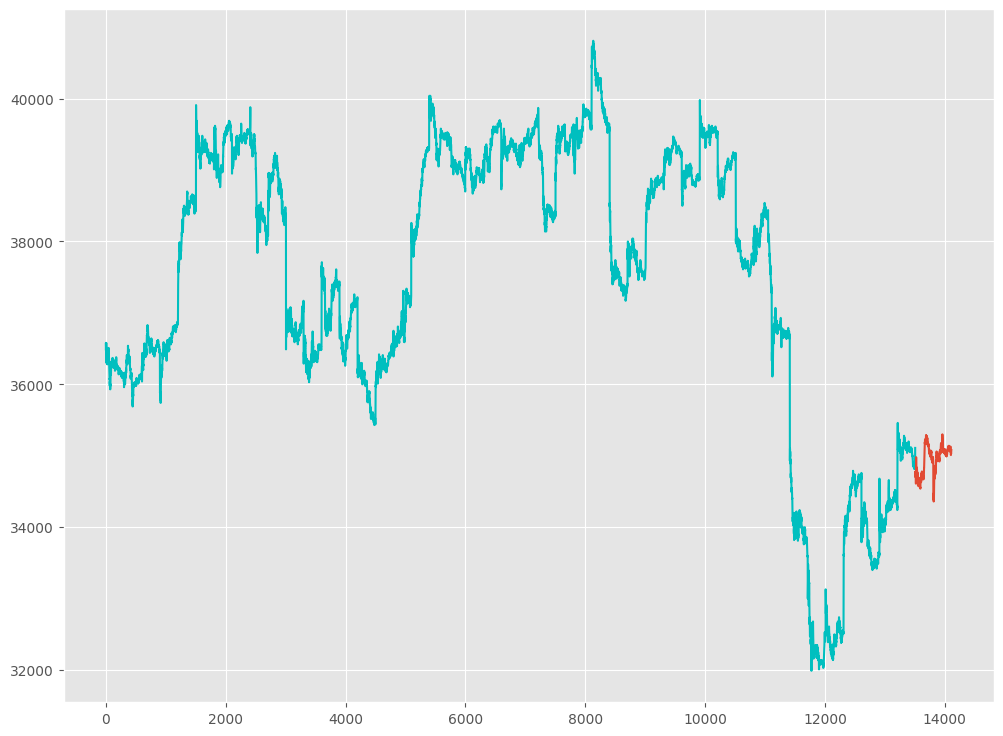

In [30]:
plt.plot(df_train, color='c')
plt.plot(df_test)

## 手動構築（SARIMAX関数）

In [31]:
# 原系列を学習データとする
train = df_train
# 学習
sarima_model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 0,12)
)
sarima_fit = sarima_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78518D+00    |proj g|=  5.78826D-04

At iterate    5    f=  5.78518D+00    |proj g|=  1.28969D-03

At iterate   10    f=  5.78313D+00    |proj g|=  1.40473D-02

At iterate   15    f=  5.76840D+00    |proj g|=  2.10355D-03

At iterate   20    f=  5.76464D+00    |proj g|=  6.88003D-04

At iterate   25    f=  5.76303D+00    |proj g|=  2.63221D-04

At iterate   30    f=  5.76287D+00    |proj g|=  6.91518D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [32]:
# 予測
##学習データの期間の予測値
train_pred = sarima_fit.predict()
##テストデータの期間の予測値
test_pred = sarima_fit.forecast(len(df_test))
##予測区間
test_pred_ci = sarima_fit.get_forecast(len(df_test)).conf_int() 
# テストデータで精度検証
print('RMSE:')
print(np.sqrt(mean_squared_error(df_test, test_pred)))
print('MAE:')
print(mean_absolute_error(df_test, test_pred)) 
print('MAPE:')
print(mean_absolute_percentage_error(df_test, test_pred))

RMSE:
258.5491078553652
MAE:
192.26057878524753
MAPE:
0.005525429826035347


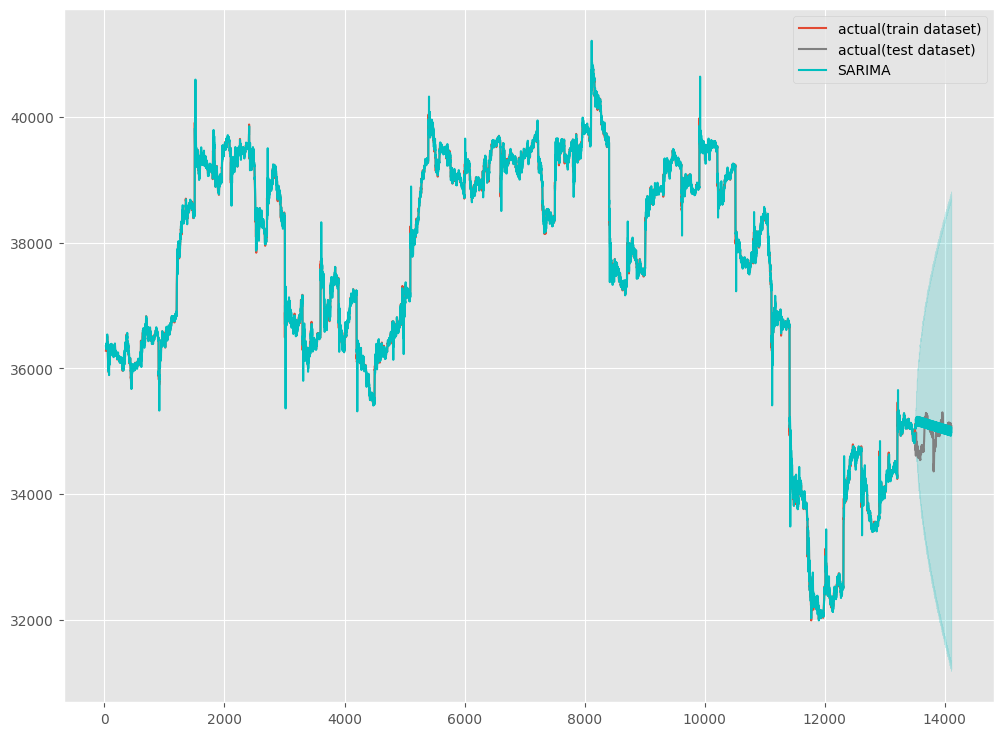

In [33]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(df_train[24:].index, df_train[24:].values, label="actual(train dataset)")
ax.plot(df_test.index, df_test.values, label="actual(test dataset)", color="gray")
ax.plot(df_train[24:].index, train_pred[24:].values, color="c")
ax.plot(df_test.index, test_pred.values, label="SARIMA", color="c") 
ax.fill_between(
    df_test.index,
    test_pred_ci.iloc[:, 0],
    test_pred_ci.iloc[:, 1],
    color='c',
    alpha=.2)
ax.legend()

## 自動構築（auto_arima関数）

In [34]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(
    train,
    seasonal=False,
    trace=True,
    max_order=5,
    n_jobs=-1,
    maxiter=100
)

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=147231.945, Time=7.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=147244.319, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=147233.282, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=147233.254, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=147242.364, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=147237.238, Time=3.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=147235.820, Time=9.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=147233.918, Time=6.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=147233.953, Time=2.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=147235.241, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=147231.845, Time=4.81 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=147234.077, Time=1.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=147234.183, Time=1.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=147235.266, Time=0.85 sec
 ARIM

In [35]:
# 予測
##学習データの期間の予測値
train_pred = arima_model.predict_in_sample()
##テストデータの期間の予測値
test_pred, test_pred_ci = arima_model.predict(
    n_periods=df_test.shape[0], 
    return_conf_int=True
)
# テストデータで精度検証
print('RMSE:')
print(np.sqrt(mean_squared_error(df_test, test_pred)))
print('MAE:')
print(mean_absolute_error(df_test, test_pred)) 
print('MAPE:')
print(mean_absolute_percentage_error(df_test, test_pred))

RMSE:
252.03950960432752
MAE:
184.0959089573638
MAPE:
0.005293991900487606


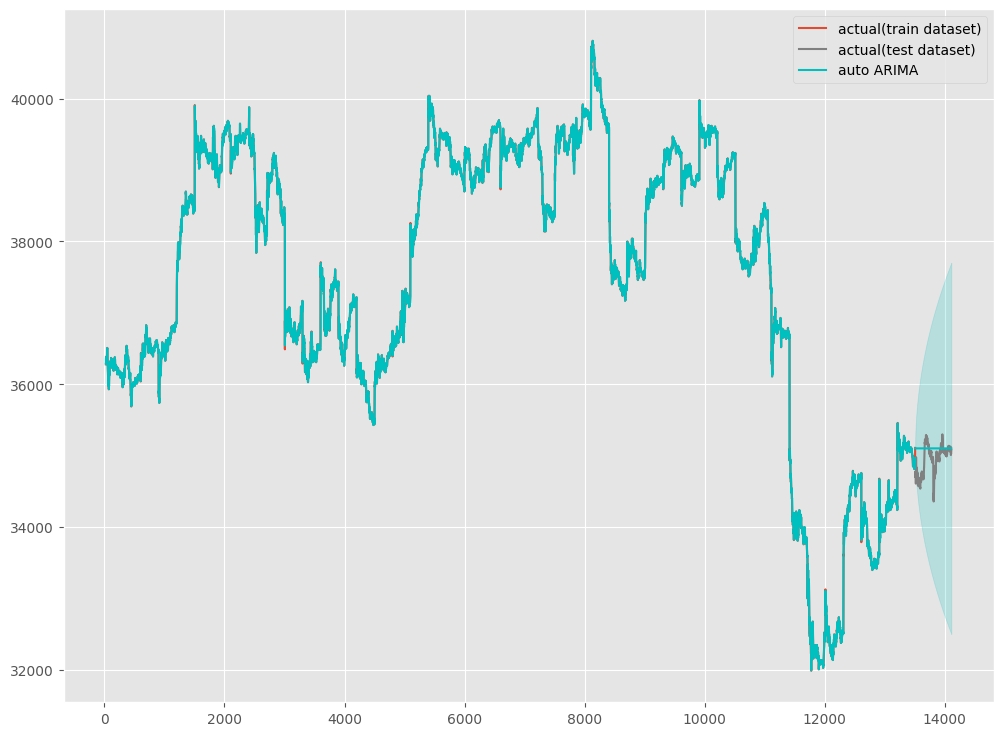

In [36]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(df_train[24:].index, df_train[24:].values, label="actual(train dataset)")
ax.plot(df_test.index, df_test.values, label="actual(test dataset)", color="gray")
ax.plot(df_train[24:].index, train_pred[24:], color="c")
ax.plot(df_test.index, test_pred, label="auto ARIMA", color="c") 
ax.fill_between(
    df_test.index,
    test_pred_ci[:, 0],
    test_pred_ci[:, 1],
    color='c',
    alpha=.2)
ax.legend()